<a href="https://colab.research.google.com/github/AasthaPundir/CODTECH-Internship-task1/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the data from csv file to panda dataframe
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
# reading the first five rows of the dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# reading the last five rows of the dataframe
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# finding total number of rows and column in the dataset
data.shape

(891, 12)

In [ ]:
# getting basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking number of missing values in each column in the dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Missing Values

In [ ]:
# dropping cabin column from the data because majority of it's value are missing
data = data.drop(columns= 'Cabin', axis=1)

In [ ]:
# replacing the missing values in the age column with the mean value
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [ ]:
#finding the mode value of "Embarked" column
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(data['Embarked'].mode()[0])

S


In [ ]:
# replacing the missing value in the Embarked column with the mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [ ]:
# getting statistical measures about the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# finding the number of people survive and not survive
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data Visualization

Exploring distributions using Histograms

In [ ]:
sns.set()

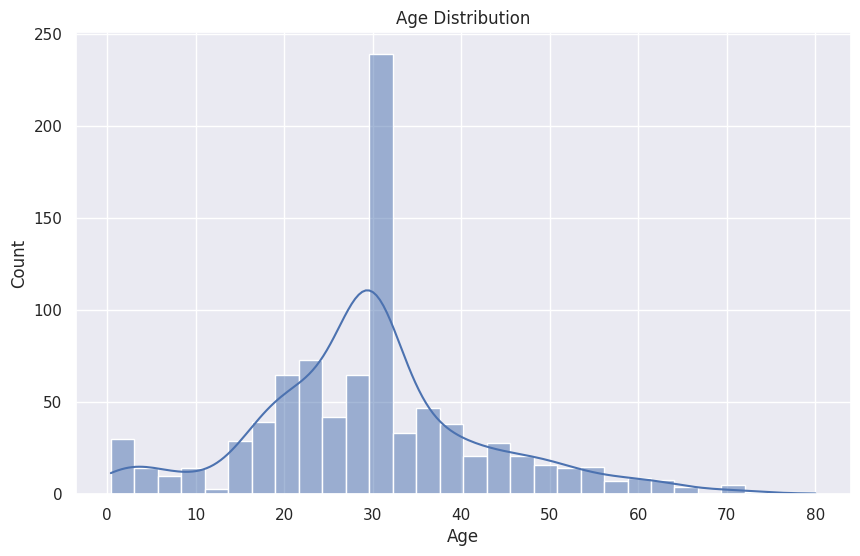

In [ ]:
# Histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

Analyzing Correlations using ScatterPlots

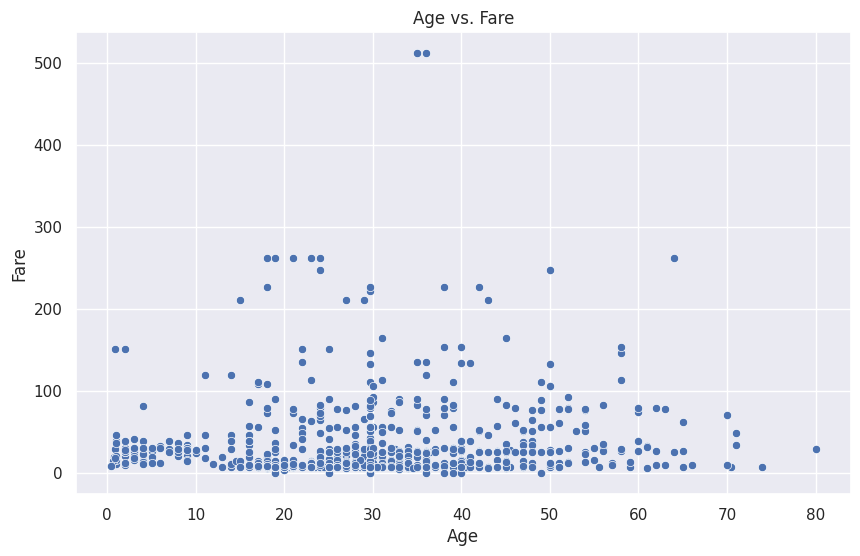

In [ ]:
# Scatter plot of age vs. fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=data)
plt.title('Age vs. Fare')
plt.show()

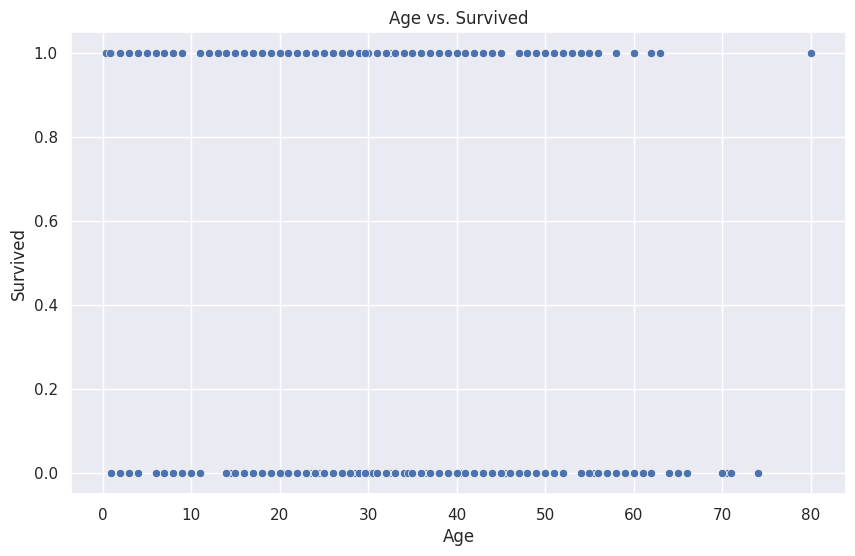

In [ ]:
# Scatter plot of age vs. survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survived', data=data)
plt.title('Age vs. Survived')
plt.show()

Creating a heatmap for the correlations

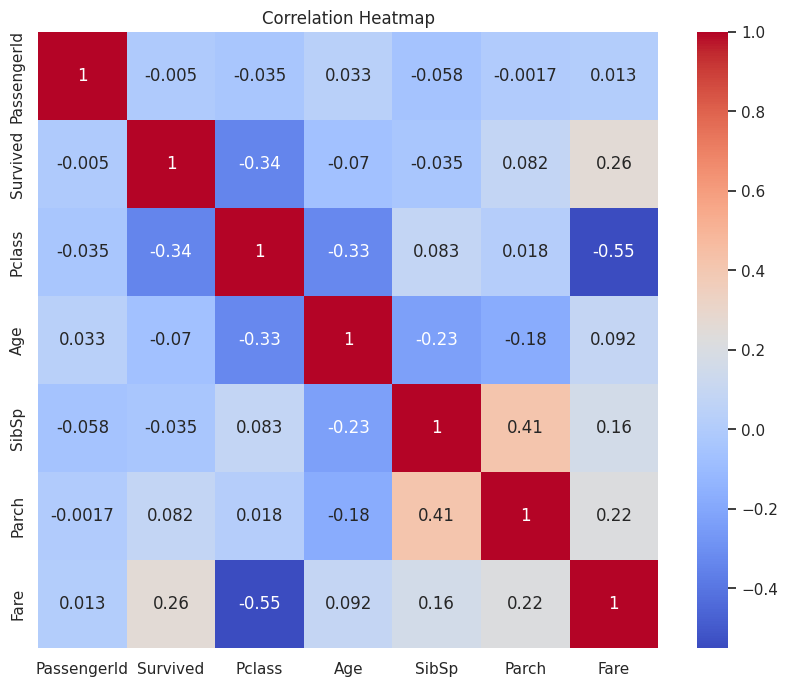

In [ ]:
# Selecting numeric columns for correlation matrix
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
corr_matrix = data[numeric_cols].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Identifying Outliers using Box Plots

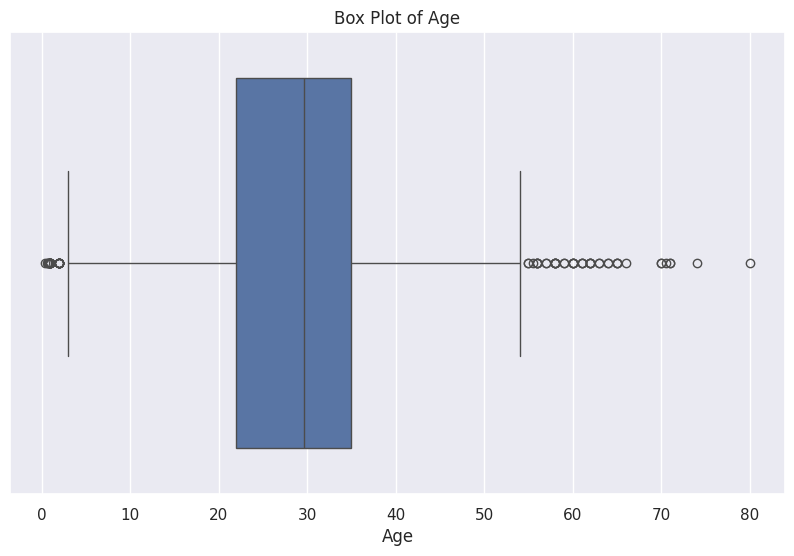

In [ ]:
# Box plot for age
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age'])
plt.title('Box Plot of Age')
plt.show()

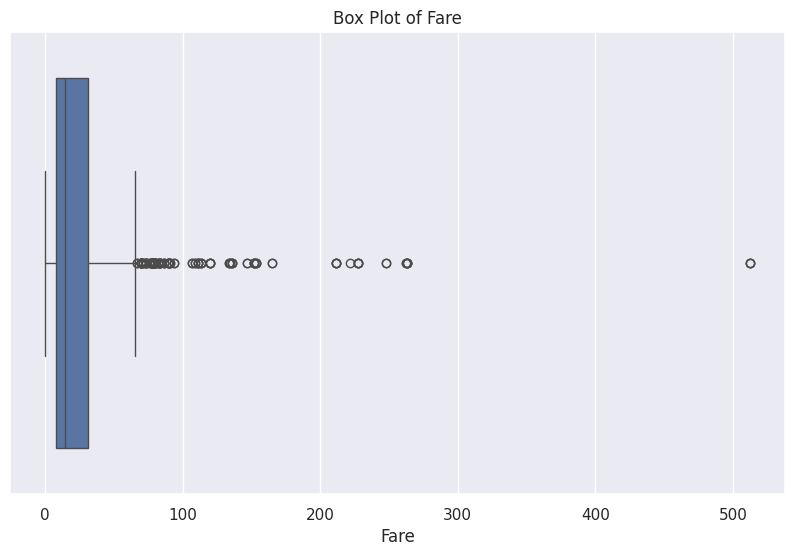

In [ ]:
# Box plot for fare
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Fare'])
plt.title('Box Plot of Fare')
plt.show()